In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_unprocessed = pd.read_csv("/home/ubuntu/Masters Thesis/data/final/Bitcoin_twitter_data_english_non_textprocessed.csv", lineterminator='\n')

In [3]:
data_unprocessed.drop(columns=["Unnamed: 0", "user_location", "user_description"], inplace=True)

In [4]:
data_unprocessed['date'] = pd.to_datetime(data_unprocessed['date'])
data_unprocessed['user_created'] = pd.to_datetime(data_unprocessed['user_created'])

In [5]:
data_unprocessed['date'].max()

Timestamp('2023-03-05 23:59:56')

In [6]:
data_unprocessed['user_age'] = (data_unprocessed["date"] - data_unprocessed["user_created"]).dt.days

### Tweets based charts

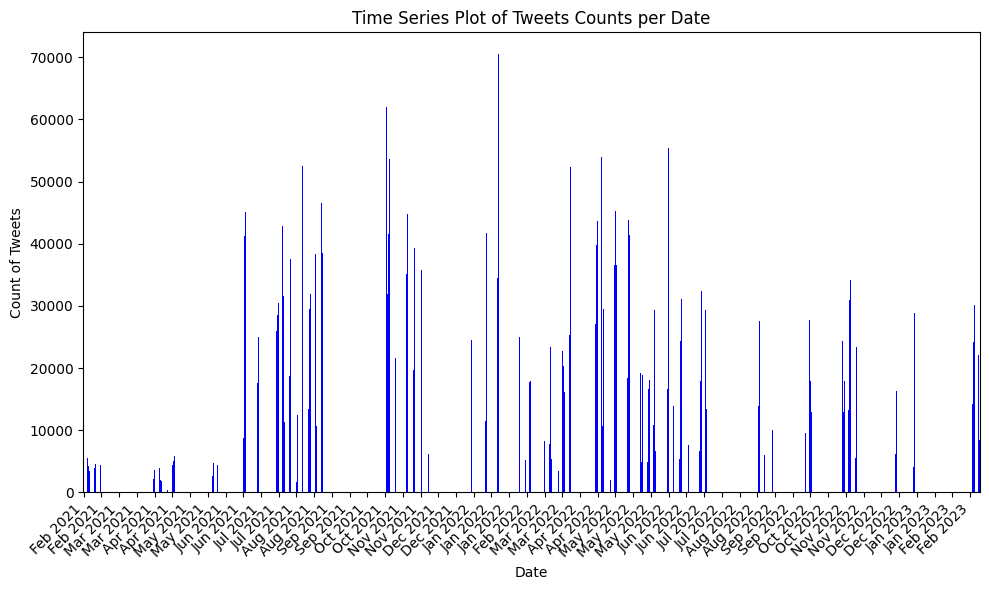

In [7]:
counts_per_date = data_unprocessed.resample('D', on='date').size()
# Create a time series plot
plt.figure(figsize=(10, 6))
counts_per_date.plot(kind='bar', color='b')
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.title('Time Series Plot of Tweets Counts per Date')
plt.xticks(rotation=45, ha='right')
n = 15  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(counts_per_date.index) if i % n == 0]
plt.xticks(range(0, len(counts_per_date), n), labels)
plt.tight_layout()
plt.show()

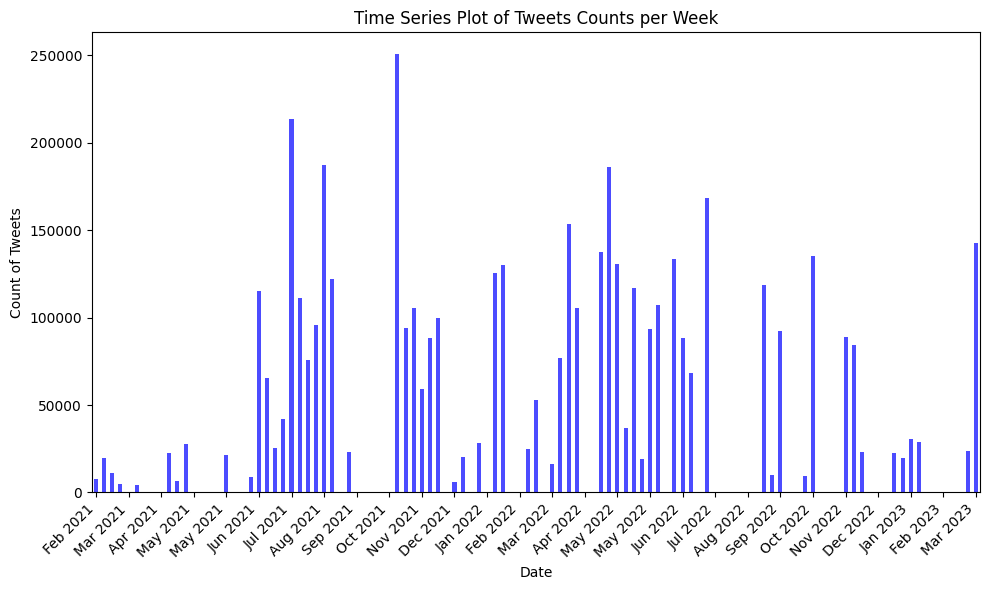

In [8]:
counts_per_week = data_unprocessed.resample('W', on='date').size()
# Create a time series plot
plt.figure(figsize=(10, 6))
counts_per_week.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.title('Time Series Plot of Tweets Counts per Week')
plt.xticks(rotation=45, ha='right')
n = 4  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(counts_per_week.index) if i % n == 0]
plt.xticks(range(0, len(counts_per_week), n), labels)
plt.tight_layout()
plt.show()

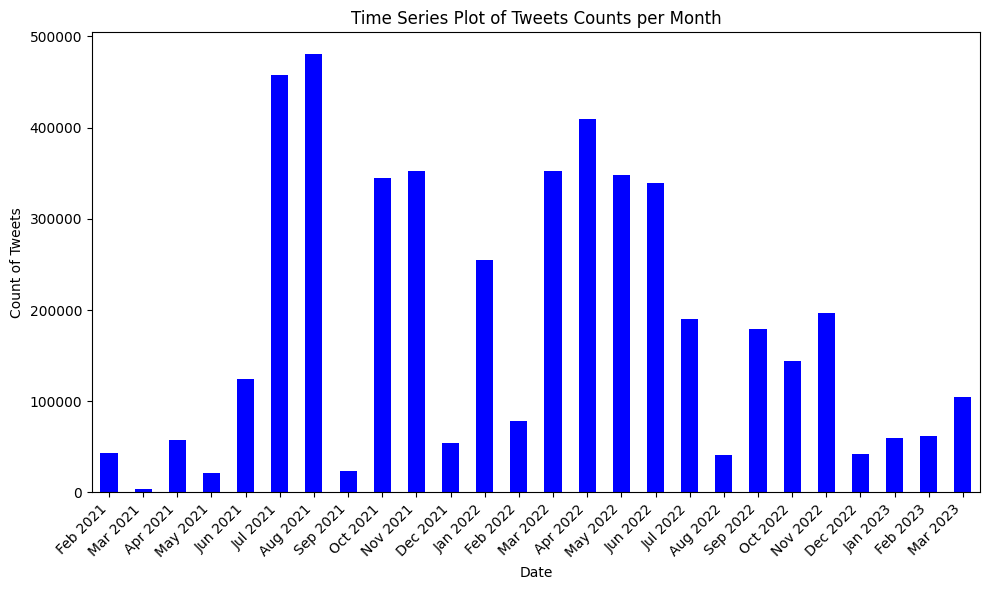

In [9]:
counts_per_month = data_unprocessed.resample('M', on='date').size()
# Create a time series plot
plt.figure(figsize=(10, 6))
counts_per_month.plot(kind='bar', color='b')
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.title('Time Series Plot of Tweets Counts per Month')
plt.xticks(rotation=45, ha='right')
n = 1  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(counts_per_month.index) if i % n == 0]
plt.xticks(range(0, len(counts_per_month), n), labels)
plt.tight_layout()
plt.show()

### User information based charts

In [10]:
# take only user based information
user_data = data_unprocessed[["date", "user_name", "user_age", "user_followers", "user_friends", "user_favourites", "user_verified"]]

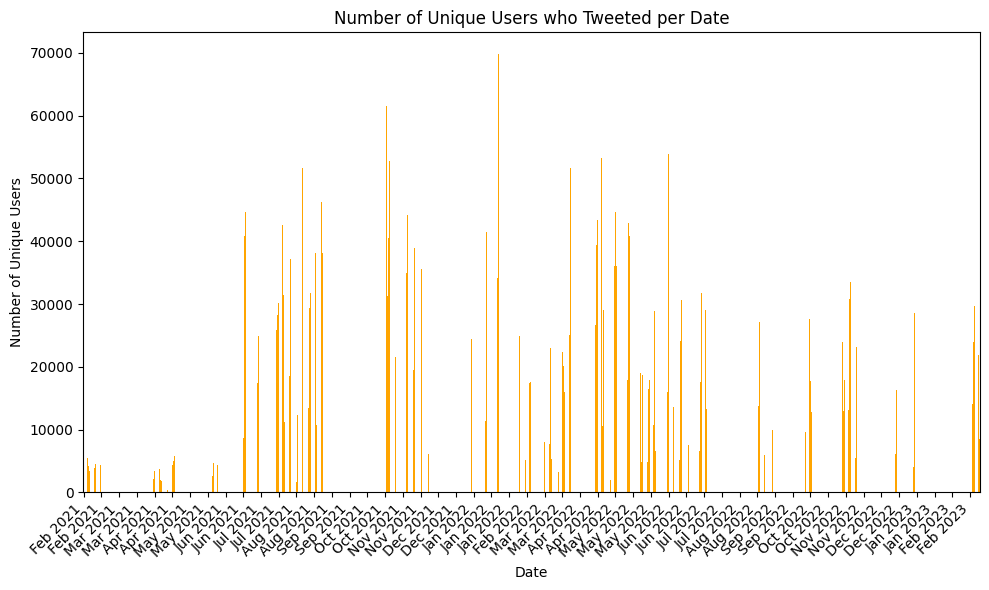

In [11]:
unique_users_per_date = user_data.drop_duplicates(subset=['date', 'user_name']).resample('D', on='date').size()
plt.figure(figsize=(10, 6))
unique_users_per_date.plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users who Tweeted per Date')
plt.xticks(rotation=45, ha='right')
n = 15  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(unique_users_per_date.index) if i % n == 0]
plt.xticks(range(0, len(unique_users_per_date), n), labels)
plt.tight_layout()
plt.show()

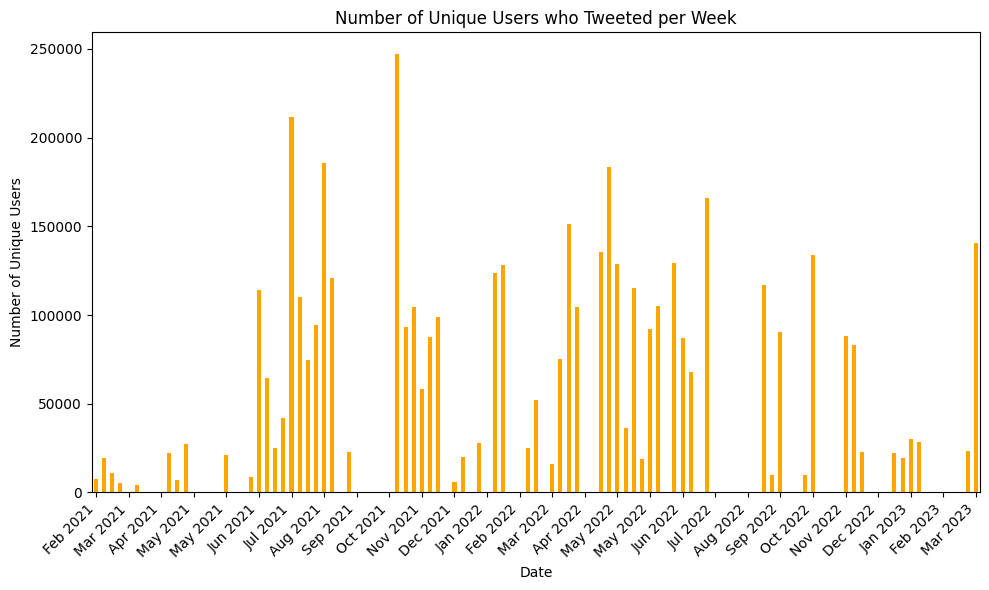

In [12]:
unique_users_per_week = user_data.drop_duplicates(subset=['date', 'user_name']).resample('W', on='date').size()
plt.figure(figsize=(10, 6))
unique_users_per_week.plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users who Tweeted per Week')
plt.xticks(rotation=45, ha='right')
n = 4  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(unique_users_per_week.index) if i % n == 0]
plt.xticks(range(0, len(unique_users_per_week), n), labels)
plt.tight_layout()
plt.show()

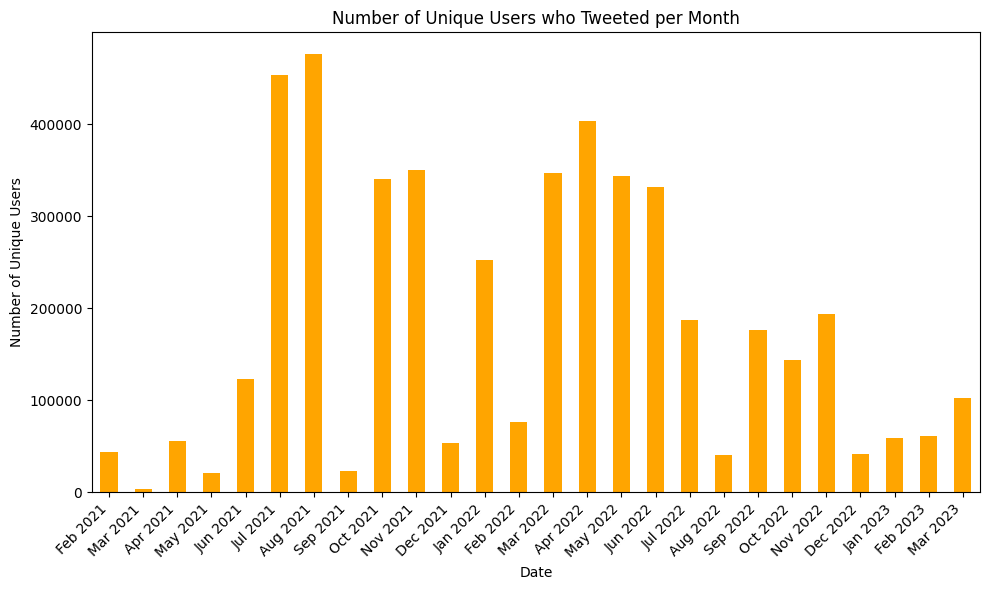

In [13]:
unique_users_per_month = user_data.drop_duplicates(subset=['date', 'user_name']).resample('M', on='date').size()
plt.figure(figsize=(10, 6))
unique_users_per_month.plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users who Tweeted per Month')
plt.xticks(rotation=45, ha='right')
n = 1  # Display every n-th label
labels = [label.strftime('%b %Y') for i, label in enumerate(unique_users_per_month.index) if i % n == 0]
plt.xticks(range(0, len(unique_users_per_month), n), labels)
plt.tight_layout()
plt.show()

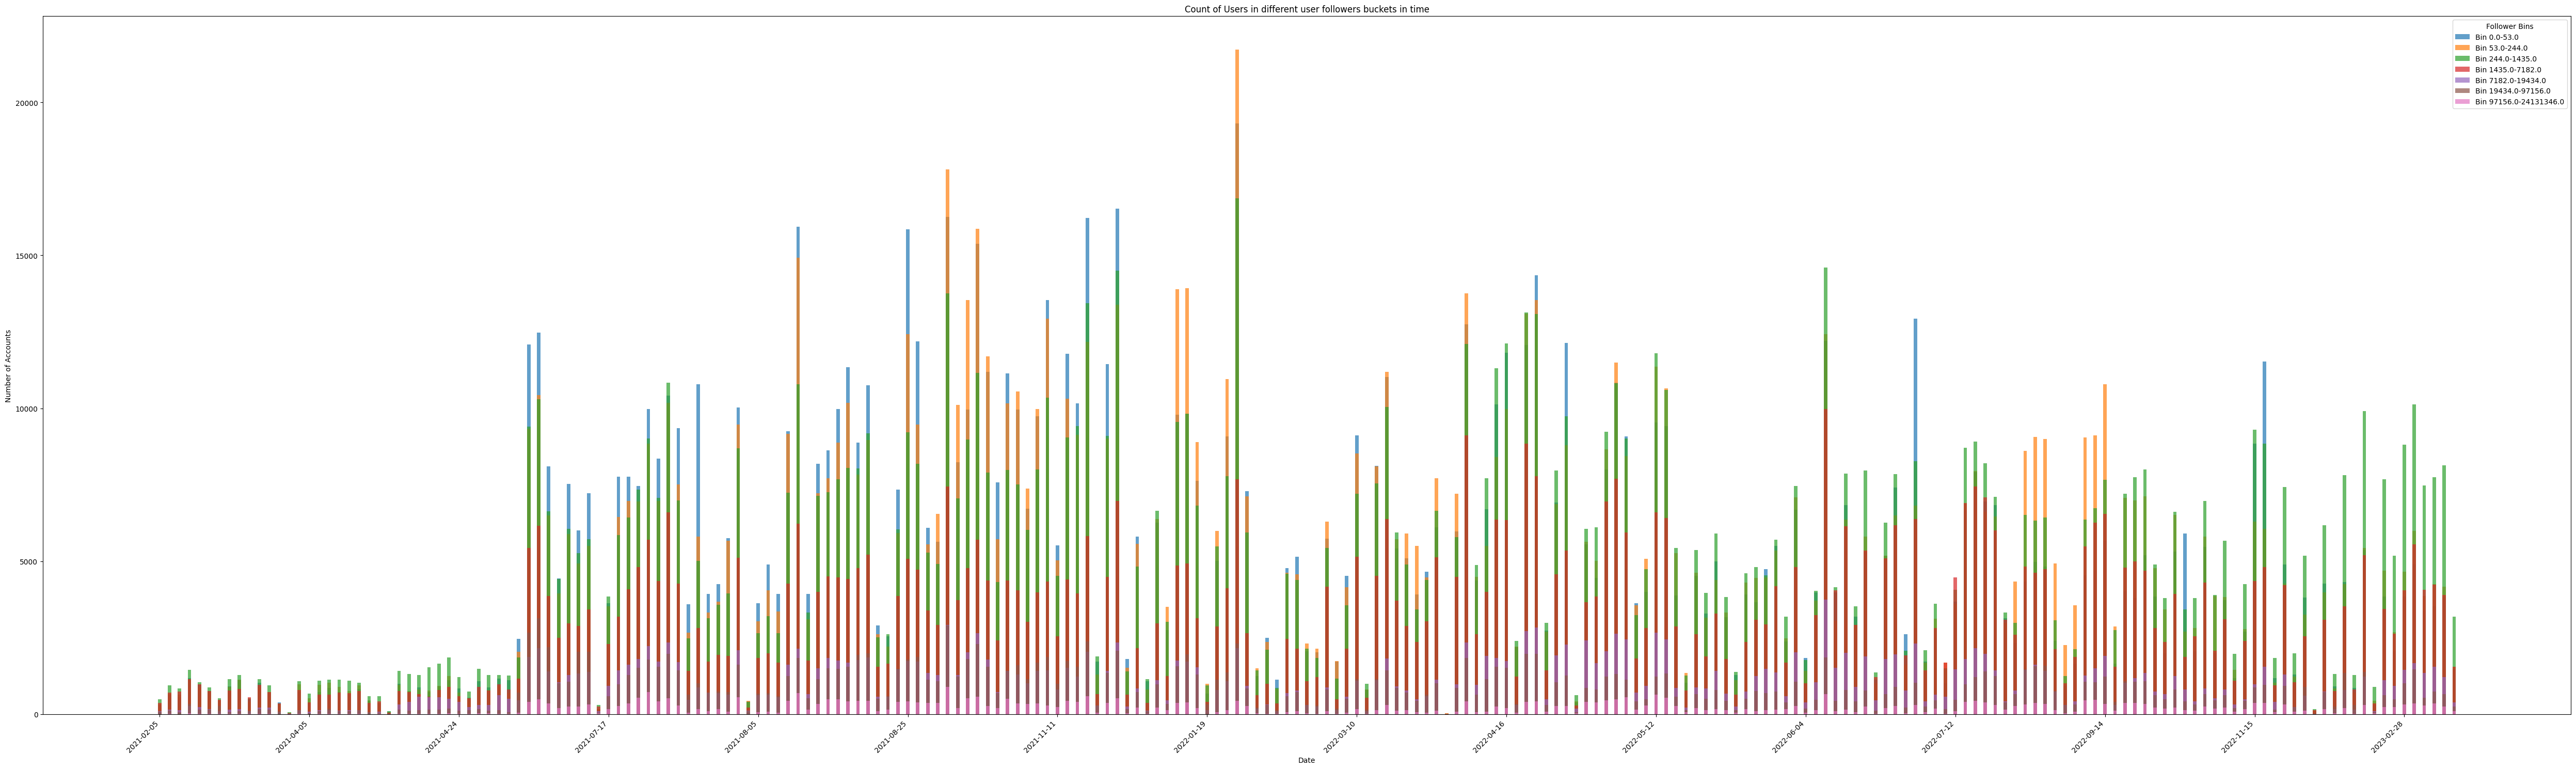

In [14]:
# percentile bins
percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
bins = np.percentile(user_data['user_followers'], percentiles)

fig, ax = plt.subplots(figsize=(50, 15))

hist_data = []
labels = []

user_data['date'] = pd.to_datetime(user_data['date']).dt.date
unique_users_per_date = user_data.drop_duplicates(subset=['date', 'user_name'])

for date, group in user_data.groupby('date'):
    followers_histogram, _ = np.histogram(group['user_followers'], bins=bins)
    hist_data.append(followers_histogram)
    labels.append(date)

hist_data = np.vstack(hist_data)

# Create a stacked bar chart
bar_width = 0.35
index = range(len(labels))

for i in range(len(bins) - 1):
    ax.bar(index, hist_data[:, i], width=bar_width, label=f'Bin {bins[i]}-{bins[i+1]}', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accounts')
ax.set_title('Stacked Histogram of Binned Followers for Each Day')

# Add legend
ax.legend(title='Follower Bins', loc='upper right')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.title("Count of Users in different user followers buckets in time")

n = 15  # Display every n-th label
xlabels = [label for i, label in enumerate(labels) if i % n == 0]
plt.xticks(range(0, len(labels), n), xlabels)
plt.tight_layout()
# Display the plot
plt.show()

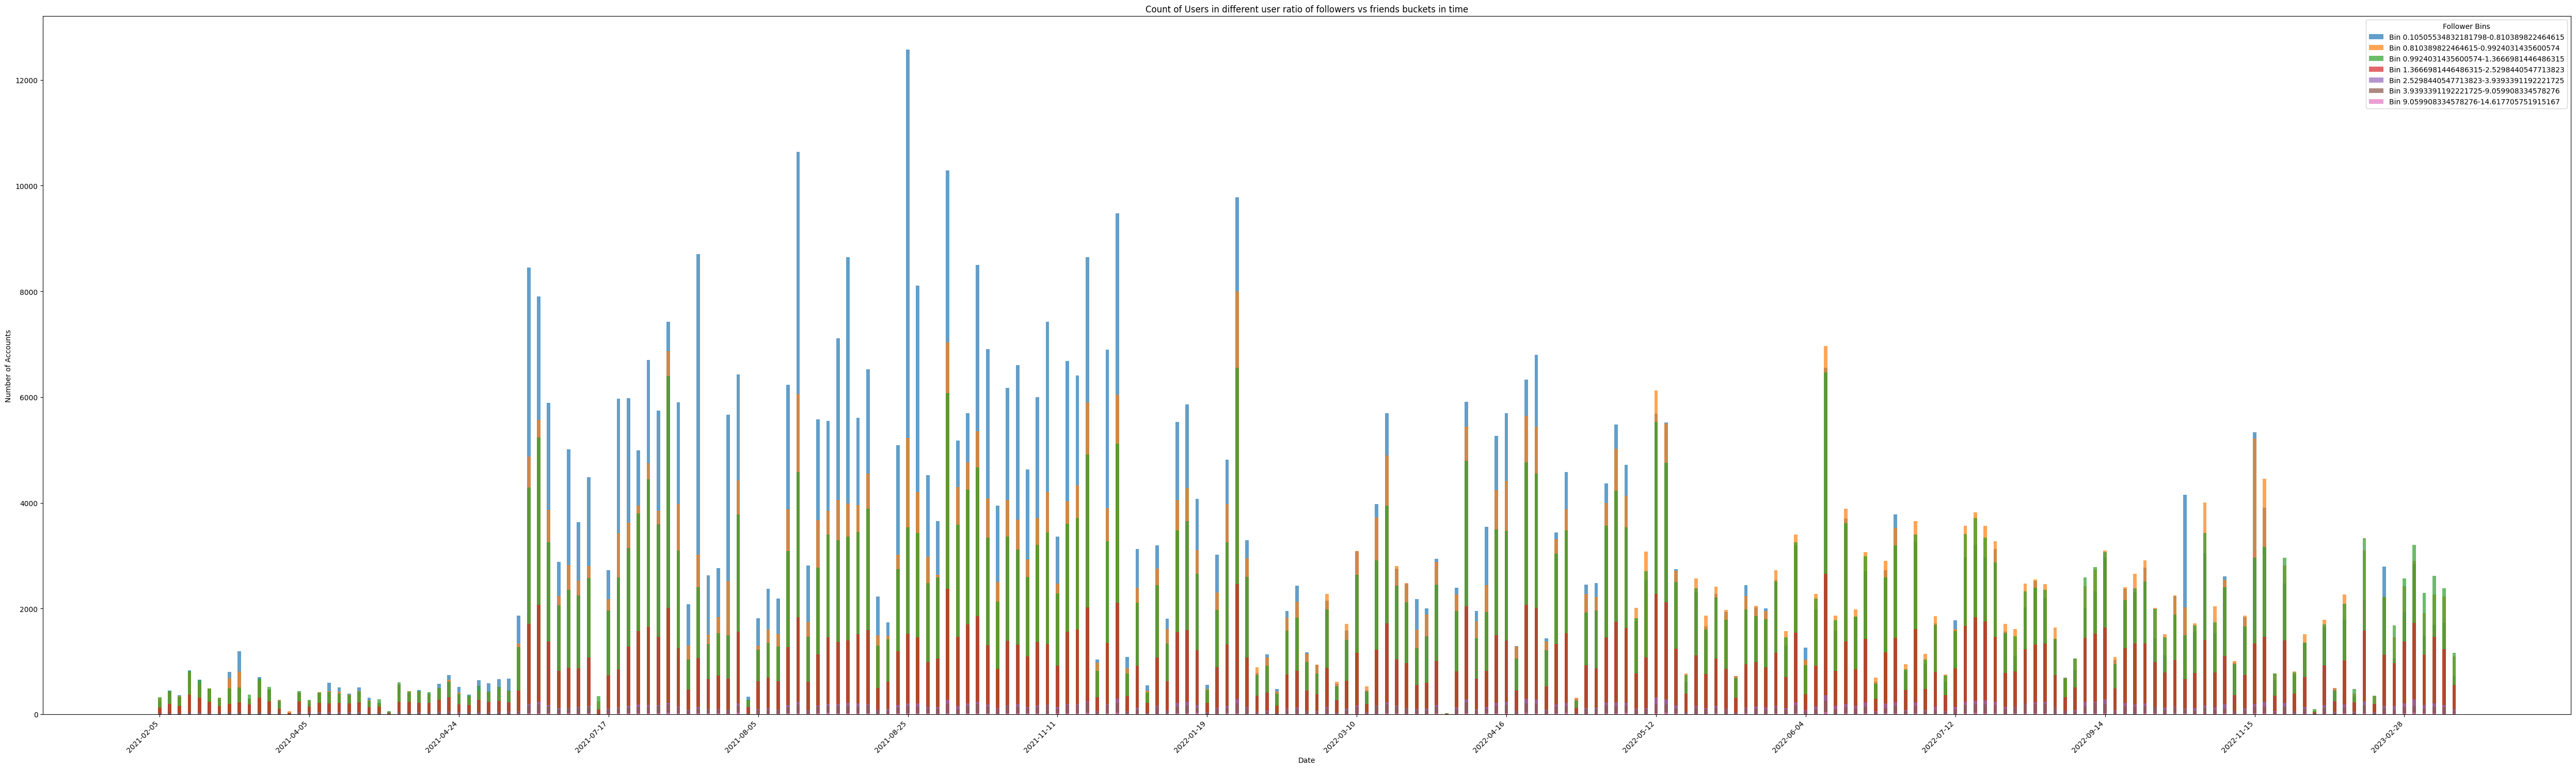

In [15]:
# user influence metric 1
user_data['user_influence'] = (np.log(user_data['user_followers']+1)+1)/(np.log(user_data['user_friends']+1)+1)

percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
bins = np.percentile(user_data['user_influence'], percentiles)

# Create a stacked histogram for each date
fig, ax = plt.subplots(figsize=(50, 15))

hist_data = []
labels = []

user_data['date'] = pd.to_datetime(user_data['date']).dt.date
unique_users_per_date = user_data.groupby(['date', 'user_name']).mean()

for date, group in unique_users_per_date.groupby('date'):
    followers_histogram, _ = np.histogram(group['user_influence'], bins=bins)
    hist_data.append(followers_histogram)
    labels.append(date)

hist_data = np.vstack(hist_data)

# Create a stacked bar chart
bar_width = 0.35
index = range(len(labels))

for i in range(len(bins) - 1):
    ax.bar(index, hist_data[:, i], width=bar_width, label=f'Bin {bins[i]}-{bins[i+1]}', alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Accounts')
ax.set_title('Stacked Histogram of Binned Ratio of Followers vs Friends for Each Day')

ax.legend(title='Follower Bins', loc='upper right')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.title("Count of Users in different user ratio of followers vs friends buckets in time")

n = 15  # Display every n-th label
xlabels = [label for i, label in enumerate(labels) if i % n == 0]
plt.xticks(range(0, len(labels), n), xlabels)
plt.tight_layout()
plt.show()

Total counts - EDA

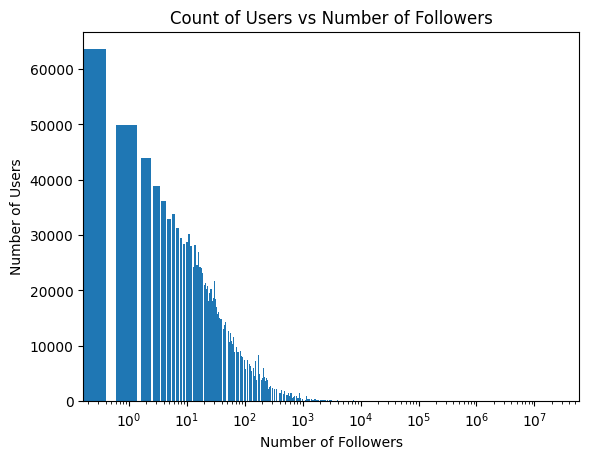

In [16]:
followers_counts = data_unprocessed["user_followers"].value_counts()
followers_counts = followers_counts.sort_index()
plt.bar(followers_counts.index, followers_counts.values)
plt.xscale('log')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')
plt.title('Count of Users vs Number of Followers')
plt.show()

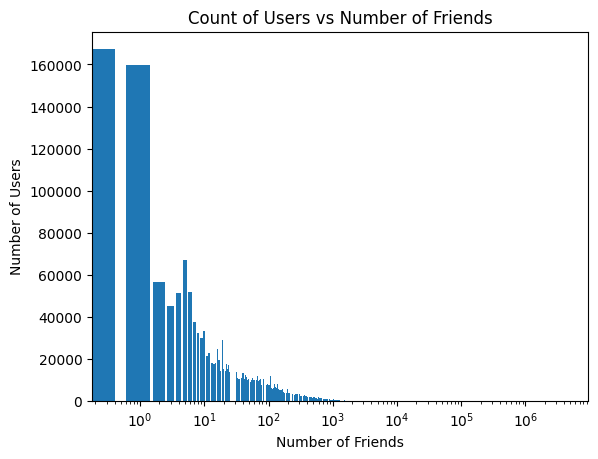

In [17]:
friends_counts = data_unprocessed["user_friends"].value_counts()
friends_counts = friends_counts.sort_index()
plt.bar(friends_counts.index, friends_counts.values)
plt.xscale('log')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.title('Count of Users vs Number of Friends')
plt.show()

User Influence Metric 1: Takes into weighting using only the number of followers and number of friends

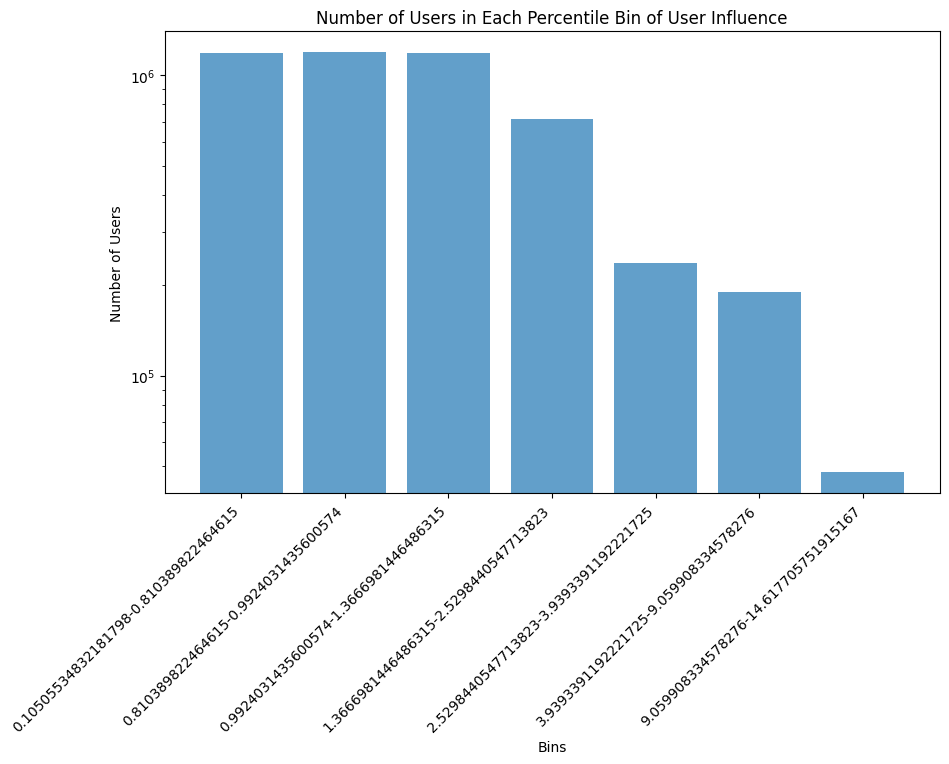

In [18]:
data_unprocessed['user_influence'] = (np.log(data_unprocessed['user_followers']+1)+1)/(np.log(data_unprocessed['user_friends']+1)+1)
percentiles = [0, 25, 50, 75, 90, 95, 99, 100] # take more bins
bins = np.percentile(user_data['user_influence'], percentiles)
bin_counts, bin_edges = np.histogram(user_data['user_influence'], bins=bins)
plt.figure(figsize=(10, 6))
plt.bar(range(len(bins) - 1), bin_counts, align='center', alpha=0.7)
plt.yscale('log')
plt.xlabel('Bins')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Percentile Bin of User Influence')
plt.xticks(range(len(bins) - 1), [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)], rotation=45, ha='right')
plt.show()

User Influence Metric 2: Takes into account number of followers, friends, favourites, and retweets

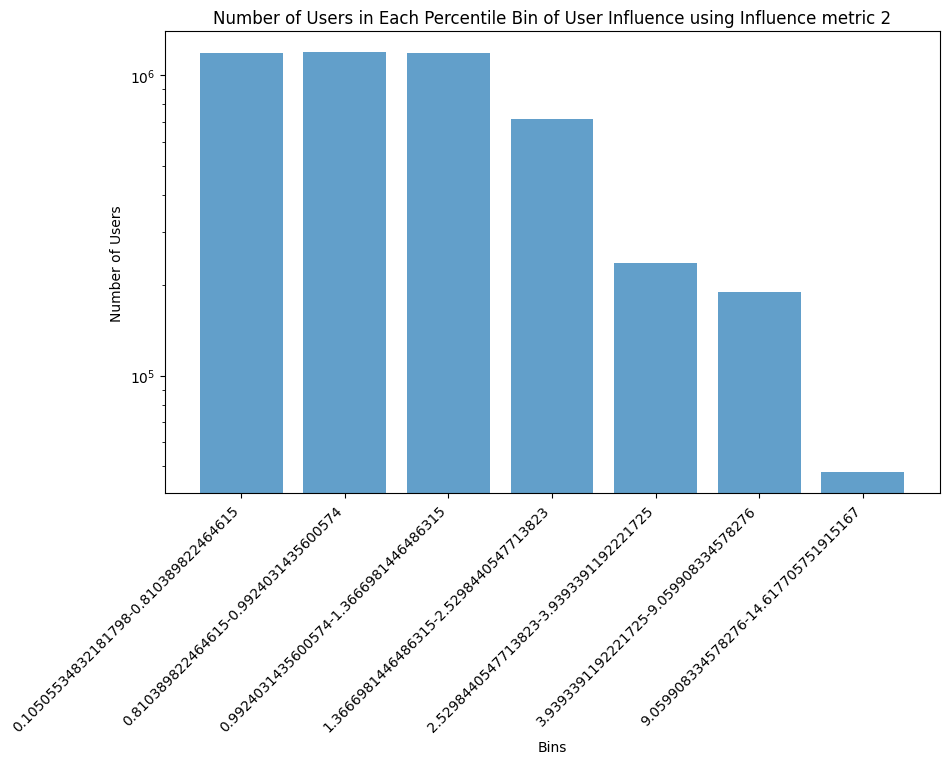

In [19]:
data_unprocessed['user_influence_2'] = ((np.log(data_unprocessed['user_followers']+1)+1)/(np.log(data_unprocessed['user_friends']+1)+1))*(np.log(data_unprocessed['user_favourites']+1)+1)*(data_unprocessed['is_retweet']+1)*(data_unprocessed["user_verified"]+1)
percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
bins = np.percentile(user_data['user_influence'], percentiles)
bin_counts, bin_edges = np.histogram(user_data['user_influence'], bins=bins)
plt.figure(figsize=(10, 6))
plt.bar(range(len(bins) - 1), bin_counts, align='center', alpha=0.7)
plt.yscale('log')
plt.xlabel('Bins')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Percentile Bin of User Influence using Influence metric 2')
plt.xticks(range(len(bins) - 1), [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)], rotation=45, ha='right')
plt.show()

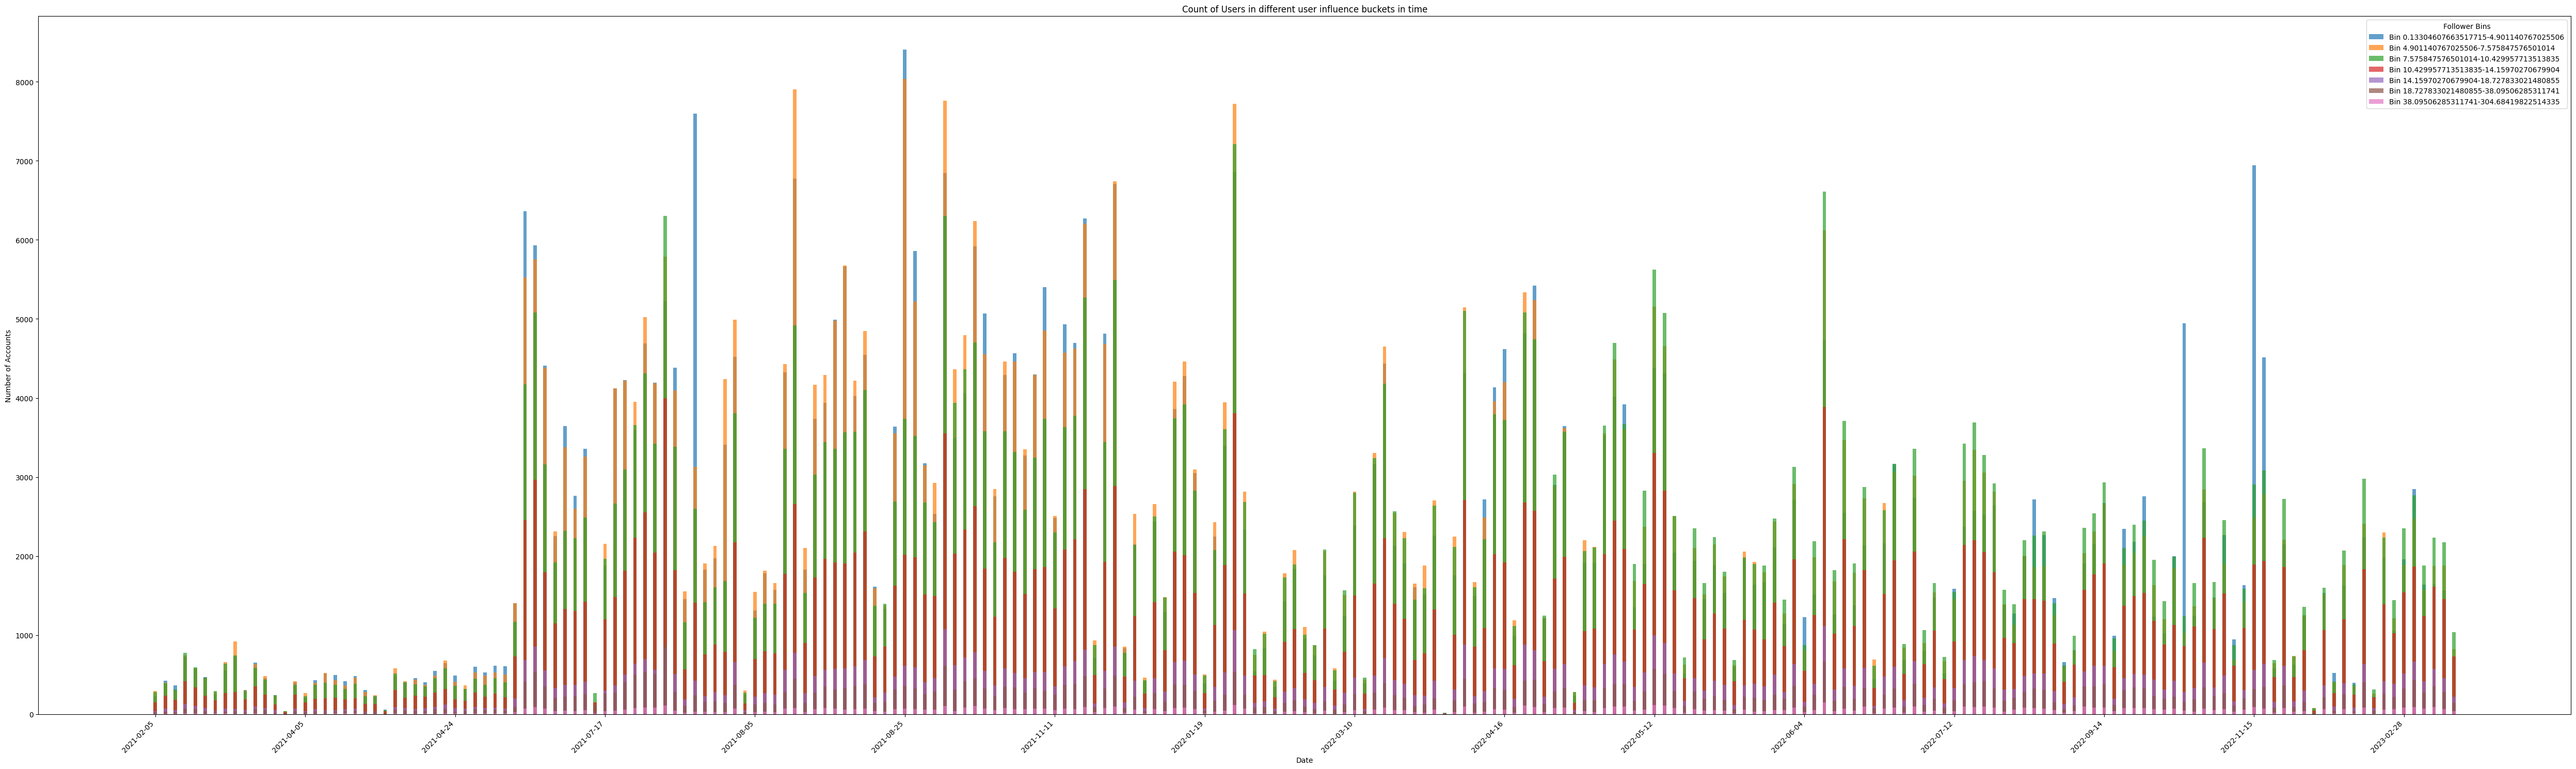

In [20]:
# user influence metric 2
user_data['user_influence_2'] = ((np.log(user_data['user_followers']+1)+1)/(np.log(user_data['user_friends']+1)+1))*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)

percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
bins = np.percentile(user_data['user_influence_2'], percentiles)

# Create a stacked histogram for each date
fig, ax = plt.subplots(figsize=(50, 15))

hist_data = []
labels = []

user_data['date'] = pd.to_datetime(user_data['date']).dt.date
unique_users_per_date = user_data.groupby(['date', 'user_name']).mean()

for date, group in unique_users_per_date.groupby('date'):
    followers_histogram, _ = np.histogram(group['user_influence_2'], bins=bins)
    hist_data.append(followers_histogram)
    labels.append(date)

hist_data = np.vstack(hist_data)

# Create a stacked bar chart
bar_width = 0.35
index = range(len(labels))

for i in range(len(bins) - 1):
    ax.bar(index, hist_data[:, i], width=bar_width, label=f'Bin {bins[i]}-{bins[i+1]}', alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Accounts')
ax.set_title('Stacked Histogram of Binned Ratio of Followers vs Friends for Each Day')

ax.legend(title='Follower Bins', loc='upper right')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.title("Count of Users in different user influence buckets in time")

n = 15  # Display every n-th label
xlabels = [label for i, label in enumerate(labels) if i % n == 0]
plt.xticks(range(0, len(labels), n), xlabels)
plt.tight_layout()
plt.show()

### Considering the most influential users based only on their user metrics

In [21]:
print(f"Total number of unique users in our dataset: {len(user_data['user_name'].unique())}")

Total number of unique users in our dataset: 661834


In [22]:
user_data['user_influence'] = (np.log(user_data['user_followers']+1)+1)/(np.log(user_data['user_friends']+1)+1)
user_data['user_influence_2'] = ((np.log(user_data['user_followers']+1)+1)/(np.log(user_data['user_friends']+1)+1))*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)
user_data['user_influence_3'] = ((np.log(user_data['user_followers']+1)+1)*(np.log(user_data['user_friends']+1)+1))*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)
user_data['user_influence_4'] = ((user_data['user_followers']+1)/(user_data['user_friends']+1))*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)
user_data['user_influence_5'] = ((user_data['user_followers']+1)/(np.log(user_data['user_friends']+1)+1))*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)
user_data['user_influence_6'] = ((user_data['user_followers']+1)/(user_data['user_friends']+1))*(user_data['user_favourites']+1)*(user_data["user_verified"]+1)
user_data['user_influence_7'] = ((user_data['user_followers']+1)/(np.log(user_data['user_friends']+1)+1))*(user_data['user_favourites']+1)*(user_data["user_verified"]+1)
user_data['user_influence_8'] = ((user_data['user_followers']+1)/(np.log(user_data['user_friends']+1)+1))
user_data['user_influence_9'] = (np.log(user_data['user_followers']+1)+1)*(user_data['user_friends']+1)*(np.log(user_data['user_favourites']+1)+1)*(user_data["user_verified"]+1)
user_data['user_influence_10'] = (np.log(user_data['user_followers']+1)+1)*(np.log(user_data['user_friends']+1)+1)*(user_data['user_favourites']+1)*(user_data["user_verified"]+1)

In [23]:
# getting the user bins for the twp metrics
percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
bins1 = np.percentile(user_data['user_influence'], percentiles)
user_data['influence_bin1'] = pd.cut(user_data['user_influence'], bins=bins1, labels=False, include_lowest=True)
bins2 = np.percentile(user_data['user_influence_2'], percentiles)
user_data['influence_bin2'] = pd.cut(user_data['user_influence_2'], bins=bins2, labels=False, include_lowest=True)
bins3 = np.percentile(user_data['user_influence_3'], percentiles)
user_data['influence_bin3'] = pd.cut(user_data['user_influence_3'], bins=bins3, labels=False, include_lowest=True)
bins4 = np.percentile(user_data['user_influence_4'], percentiles)
user_data['influence_bin4'] = pd.cut(user_data['user_influence_4'], bins=bins4, labels=False, include_lowest=True)
bins5 = np.percentile(user_data['user_influence_5'], percentiles)
user_data['influence_bin5'] = pd.cut(user_data['user_influence_5'], bins=bins5, labels=False, include_lowest=True)
bins6 = np.percentile(user_data['user_influence_6'], percentiles)
user_data['influence_bin6'] = pd.cut(user_data['user_influence_6'], bins=bins6, labels=False, include_lowest=True)
bins7 = np.percentile(user_data['user_influence_7'], percentiles)
user_data['influence_bin7'] = pd.cut(user_data['user_influence_7'], bins=bins7, labels=False, include_lowest=True)
bins8 = np.percentile(user_data['user_influence_8'], percentiles)
user_data['influence_bin8'] = pd.cut(user_data['user_influence_8'], bins=bins8, labels=False, include_lowest=True)
bins9 = np.percentile(user_data['user_influence_9'], percentiles)
user_data['influence_bin9'] = pd.cut(user_data['user_influence_9'], bins=bins9, labels=False, include_lowest=True)
bins10 = np.percentile(user_data['user_influence_10'], percentiles)
user_data['influence_bin10'] = pd.cut(user_data['user_influence_10'], bins=bins10, labels=False, include_lowest=True)

In [24]:
last_bin_users1 = user_data[user_data['influence_bin1'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users2 = user_data[user_data['influence_bin2'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users3 = user_data[user_data['influence_bin3'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users4 = user_data[user_data['influence_bin4'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users5 = user_data[user_data['influence_bin5'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users6 = user_data[user_data['influence_bin6'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users7 = user_data[user_data['influence_bin7'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users8 = user_data[user_data['influence_bin8'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users9 = user_data[user_data['influence_bin9'] == len(percentiles) - 2]['user_name'].unique()
last_bin_users10 = user_data[user_data['influence_bin10'] == len(percentiles) - 2]['user_name'].unique()
print(f"Number of users in the last bin as per influencer metric 1: {len(last_bin_users1)}")
print(f"Number of users in the last bin as per influencer metric 2: {len(last_bin_users2)}")
print(f"Number of users in the last bin as per influencer metric 3: {len(last_bin_users3)}")
print(f"Number of users in the last bin as per influencer metric 4: {len(last_bin_users4)}")
print(f"Number of users in the last bin as per influencer metric 5: {len(last_bin_users5)}")
print(f"Number of users in the last bin as per influencer metric 6: {len(last_bin_users6)}")
print(f"Number of users in the last bin as per influencer metric 7: {len(last_bin_users7)}")
print(f"Number of users in the last bin as per influencer metric 8: {len(last_bin_users8)}")
print(f"Number of users in the last bin as per influencer metric 9: {len(last_bin_users9)}")
print(f"Number of users in the last bin as per influencer metric 10: {len(last_bin_users10)}")

Number of users in the last bin as per influencer metric 1: 556
Number of users in the last bin as per influencer metric 2: 2022
Number of users in the last bin as per influencer metric 3: 4338
Number of users in the last bin as per influencer metric 4: 1418
Number of users in the last bin as per influencer metric 5: 2513
Number of users in the last bin as per influencer metric 6: 2484
Number of users in the last bin as per influencer metric 7: 2571
Number of users in the last bin as per influencer metric 8: 1980
Number of users in the last bin as per influencer metric 9: 1892
Number of users in the last bin as per influencer metric 10: 3668


In [25]:
# comparing the influencers in the other data sets that includes only the influencers
influencer_dataset = pd.read_csv("/home/ubuntu/Masters Thesis/data/twitter/dataset_52-person-from-2021-02-05_2023-06-12_21-34-17-266_with_importance_coefficient_and_clean_text.csv")

In [26]:
influencer_dataset_users = influencer_dataset["user/name"].unique()

In [27]:
metric1_common_influencers = set(last_bin_users1).intersection(influencer_dataset_users)
metric2_common_influencers = set(last_bin_users2).intersection(influencer_dataset_users)
metric3_common_influencers = set(last_bin_users3).intersection(influencer_dataset_users)
metric4_common_influencers = set(last_bin_users4).intersection(influencer_dataset_users)
metric5_common_influencers = set(last_bin_users5).intersection(influencer_dataset_users)
metric6_common_influencers = set(last_bin_users6).intersection(influencer_dataset_users)
metric7_common_influencers = set(last_bin_users7).intersection(influencer_dataset_users)
metric8_common_influencers = set(last_bin_users8).intersection(influencer_dataset_users)
metric9_common_influencers = set(last_bin_users9).intersection(influencer_dataset_users)
metric10_common_influencers = set(last_bin_users10).intersection(influencer_dataset_users)
print(f"Number of common influencers in the two datsets as per influencer metric 1 is {len(metric1_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 2 is {len(metric2_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 3 is {len(metric3_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 4 is {len(metric4_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 5 is {len(metric5_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 6 is {len(metric6_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 7 is {len(metric7_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 8 is {len(metric8_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 9 is {len(metric9_common_influencers)}")
print(f"Number of common influencers in the two datsets as per influencer metric 10 is {len(metric10_common_influencers)}")


Number of common influencers in the two datsets as per influencer metric 1 is 0
Number of common influencers in the two datsets as per influencer metric 2 is 5
Number of common influencers in the two datsets as per influencer metric 3 is 14
Number of common influencers in the two datsets as per influencer metric 4 is 9
Number of common influencers in the two datsets as per influencer metric 5 is 28
Number of common influencers in the two datsets as per influencer metric 6 is 22
Number of common influencers in the two datsets as per influencer metric 7 is 23
Number of common influencers in the two datsets as per influencer metric 8 is 27
Number of common influencers in the two datsets as per influencer metric 9 is 0
Number of common influencers in the two datsets as per influencer metric 10 is 6


In [28]:
all_users_in_data = user_data['user_name'].unique()
common_users = set(all_users_in_data).intersection(influencer_dataset_users)
print(f"number of common users in the two datasets are {len(common_users)}")

number of common users in the two datasets are 34


Metric 5 gives maximum users in the most influential bucket, i.e. 28/34

In [29]:
# taking the 100 largest influence score users and comparing with the influencer dataset
def get_influencer_count(user_data, influencer_metric, n, metric_no):
    user_data_sorted = user_data.sort_values(by=influencer_metric, ascending=False)
    unique_users = user_data_sorted.drop_duplicates(subset='user_name', keep='first')
    top_influencers = unique_users.nlargest(n, influencer_metric)['user_name']
    print(f"Number of common influencers in the two datsets as per influencer metric {metric_no} with {n} top influencers is {len(set(top_influencers).intersection(influencer_dataset_users))}")

get_influencer_count(user_data, 'user_influence', 100, 1)
get_influencer_count(user_data, 'user_influence_2', 100, 2)
get_influencer_count(user_data, 'user_influence_3', 100, 3)
get_influencer_count(user_data, 'user_influence_4', 100, 4)
get_influencer_count(user_data, 'user_influence_5', 100, 5)
get_influencer_count(user_data, 'user_influence_6', 100, 6)
get_influencer_count(user_data, 'user_influence_7', 100, 7)
get_influencer_count(user_data, 'user_influence_8', 100, 8)
get_influencer_count(user_data, 'user_influence_9', 100, 9)
get_influencer_count(user_data, 'user_influence_10', 100, 10)

Number of common influencers in the two datsets as per influencer metric 1 with 100 top influencers is 0
Number of common influencers in the two datsets as per influencer metric 2 with 100 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 3 with 100 top influencers is 0
Number of common influencers in the two datsets as per influencer metric 4 with 100 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 5 with 100 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 6 with 100 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 7 with 100 top influencers is 3
Number of common influencers in the two datsets as per influencer metric 8 with 100 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 9 with 100 top influencers is 0
Number of common influencers in the two datsets as per 

In [30]:
get_influencer_count(user_data, 'user_influence', 200, 1)
get_influencer_count(user_data, 'user_influence_2', 200, 2)
get_influencer_count(user_data, 'user_influence_3', 200, 3)
get_influencer_count(user_data, 'user_influence_4', 200, 4)
get_influencer_count(user_data, 'user_influence_5', 200, 5)
get_influencer_count(user_data, 'user_influence_6', 200, 6)
get_influencer_count(user_data, 'user_influence_7', 200, 7)
get_influencer_count(user_data, 'user_influence_8', 200, 8)
get_influencer_count(user_data, 'user_influence_9', 200, 9)
get_influencer_count(user_data, 'user_influence_10', 200, 10)

Number of common influencers in the two datsets as per influencer metric 1 with 200 top influencers is 0
Number of common influencers in the two datsets as per influencer metric 2 with 200 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 3 with 200 top influencers is 0
Number of common influencers in the two datsets as per influencer metric 4 with 200 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 5 with 200 top influencers is 5
Number of common influencers in the two datsets as per influencer metric 6 with 200 top influencers is 3
Number of common influencers in the two datsets as per influencer metric 7 with 200 top influencers is 8
Number of common influencers in the two datsets as per influencer metric 8 with 200 top influencers is 3
Number of common influencers in the two datsets as per influencer metric 9 with 200 top influencers is 0
Number of common influencers in the two datsets as per 

In [31]:
get_influencer_count(user_data, 'user_influence', 500, 1)
get_influencer_count(user_data, 'user_influence_2', 500, 2)
get_influencer_count(user_data, 'user_influence_3', 500, 3)
get_influencer_count(user_data, 'user_influence_4', 500, 4)
get_influencer_count(user_data, 'user_influence_5', 500, 5)
get_influencer_count(user_data, 'user_influence_6', 500, 6)
get_influencer_count(user_data, 'user_influence_7', 500, 7)
get_influencer_count(user_data, 'user_influence_8', 500, 8)
get_influencer_count(user_data, 'user_influence_9', 500, 9)
get_influencer_count(user_data, 'user_influence_10', 500, 10)

Number of common influencers in the two datsets as per influencer metric 1 with 500 top influencers is 0
Number of common influencers in the two datsets as per influencer metric 2 with 500 top influencers is 1
Number of common influencers in the two datsets as per influencer metric 3 with 500 top influencers is 5
Number of common influencers in the two datsets as per influencer metric 4 with 500 top influencers is 2
Number of common influencers in the two datsets as per influencer metric 5 with 500 top influencers is 11
Number of common influencers in the two datsets as per influencer metric 6 with 500 top influencers is 8
Number of common influencers in the two datsets as per influencer metric 7 with 500 top influencers is 12
Number of common influencers in the two datsets as per influencer metric 8 with 500 top influencers is 8
Number of common influencers in the two datsets as per influencer metric 9 with 500 top influencers is 0
Number of common influencers in the two datsets as pe

In [32]:
user_data_influencers = user_data[user_data["user_name"].isin(common_users)]
user_data_influencers.head()

,date,user_name,user_age,user_followers,user_friends,user_favourites,user_verified,user_influence,user_influence_2,user_influence_3,...,influence_bin1,influence_bin2,influence_bin3,influence_bin4,influence_bin5,influence_bin6,influence_bin7,influence_bin8,influence_bin9,influence_bin10
549,2021-02-10,John E Deaton,771,10852.0,1034.0,1084.0,False,1.295894,10.353335,653.066161,...,2,2,3,3,4,3,3,4,3,2
4472,2021-02-09,John E Deaton,770,10851.0,1034.0,1084.0,False,1.295883,10.353243,653.060314,...,2,2,3,3,4,3,3,4,3,2
4681,2021-02-09,John E Deaton,770,10851.0,1034.0,1084.0,False,1.295883,10.353243,653.060314,...,2,2,3,3,4,3,3,4,3,2
11524,2021-02-08,Forbes Crypto,1259,184610.0,345.0,3626.0,True,1.917202,35.261797,1652.851749,...,3,5,6,5,6,5,5,6,3,3
13562,2021-02-07,John E Deaton,768,10852.0,1034.0,1084.0,False,1.295894,10.353335,653.066161,...,2,2,3,3,4,3,3,4,3,2


In [33]:
# top influencers based on number of followers
user_no_duplicates = user_data.drop_duplicates(subset='user_name')
top_followers = user_no_duplicates.nlargest(100, 'user_followers')['user_name']
top_followers

184286                Reuters
1067500                Forbes
342547                   NDTV
3166844    The Times Of India
147746                   CGTN
                  ...        
29141                 Binance
362256              UP POLICE
4127490        Gordo Crypto 🌮
351290               India TV
1925905             talkSPORT
Name: user_name, Length: 100, dtype: object

In [34]:
common_influencers_followers_and_dataset = set(influencer_dataset_users).intersection(top_followers)
common_influencers_followers_and_dataset
# high number of followers and influencers has no relation it seems

set()